In [3]:
import os
import sys
import argparse
from os.path import dirname, realpath


In [4]:
sys.path.append("./src/")
sys.path.append(dirname(dirname(realpath(os.getcwd()))))

In [5]:
%run load_Results.py

In [6]:
wt00 = np.where(gold0 == 1, 1/.064, 1)

In [76]:
wts01 = np.where(gold1 == 1, 1/np.mean(gold1), 1)
wts02 = np.where(gold2 == 1, 2/np.mean(gold2), 2)
wts03 = np.where(gold3 == 1, 3/np.mean(gold3), 3)
wts04 = np.where(gold4 == 1, 4/np.mean(gold4), 4)

In [62]:
wts01 = np.where(gold1 == 1, 1/np.mean(gold0), 1)
wts02 = np.where(gold2 == 1, 2/np.mean(gold0), 1)
wts03 = np.where(gold3 == 1, 3/np.mean(gold0), 1)
wts04 = np.where(gold4 == 1, 4/np.mean(gold0), 1)

In [158]:
wts1234 = np.concatenate((wts01,wts02, wts03, wts04))
y1234 = np.concatenate((gold1,gold2, gold3, gold4))
lo1234 = logit( np.concatenate((mp1,mp2, mp3, mp4)) )
ti = np.concatenate((np.ones(len(mp1)), 2*np.ones(len(mp2)), 3*np.ones(len(mp3)), 4*np.ones(len(mp4))))


In [159]:
tlo1234 = logit( np.concatenate((tp1,tp2, tp3, tp4)) )
tti = np.concatenate((np.ones(len(tp1)), 2*np.ones(len(tp2)), 3*np.ones(len(tp3)), 4*np.ones(len(tp4))))

In [160]:
def temp_pred0 (alpha,  test_logit):    
    logi =  (test_logit  )/ alpha   
    proba = expit ( logi   ) 
    return proba

In [97]:
def weighted_temp2_scaling (logits, y, wts):
    def temperature_obj(t):
        temp_logits =   (logits) /  t [0] +  t[1]
        probs = expit(temp_logits)
        return log_loss(y, probs, sample_weight=wts)    
    res = minimize (temperature_obj,x0 = [.1,.1])
    return res.x

In [157]:
pc = temp_pred0(alpha_00_1234, lo1234 )


(array([1012., 3912., 6769., 8501., 9122., 9141., 8241., 5126., 2149.,
         307.]),
 array([0.4253714 , 0.4325431 , 0.4397148 , 0.44688649, 0.45405819,
        0.46122989, 0.46840159, 0.47557329, 0.48274499, 0.48991668,
        0.49708838]),
 <BarContainer object of 10 artists>)

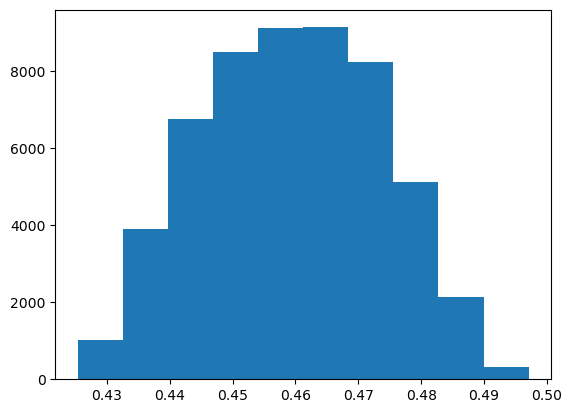

In [161]:
plt.hist( pc )

In [98]:
alpha_0_1234  = weighted_temp2_scaling(  lo1234 , y1234,  wts1234)


In [99]:
def temp_pred2 (alpha,  test_logit):    
    logi =  (test_logit  )/ alpha[0]     + alpha[1]
    proba = expit ( logi   ) #*tt.x[5]    
    return proba

In [100]:
cal_0_1234 = temp_pred2(alpha_0_1234, lo1234 )
cal_t_1234 = temp_pred2(alpha_0_1234, tlo1234 )

In [145]:
w01 = 1/cal_0_1234 [time_index==1]
w02 = 1/cal_0_1234 [time_index==2]
w03 = 1/cal_0_1234 [time_index==3]
w04 = 1/cal_0_1234 [time_index==4]

In [146]:
wts1 = np.where(gold1 == 1, w01/np.mean(gold1), w01)
wts2 = np.where(gold2 == 1, w02/np.mean(gold2), w02)
wts3 = np.where(gold3 == 1, w03/np.mean(gold3), w03)
wts4 = np.where(gold4 == 1, w04/np.mean(gold4), w04)

In [147]:
temp1 = weighted_temp2_scaling(logit(mp1), gold1, wts1)
temp2 = weighted_temp2_scaling(logit(mp2), gold2, wts2)
temp3 = weighted_temp2_scaling(logit(mp3), gold3, wts3)
temp4 = weighted_temp2_scaling(logit(mp4), gold4, wts4)

In [148]:
[temp1, temp2, temp3, temp4]

[array([0.95783195, 1.57984201]),
 array([0.76092257, 2.66104887]),
 array([0.77726961, 3.10094544]),
 array([1.11533476, 2.24380915])]

In [149]:
cal_1 = temp_pred2 ( temp1, logit(tp1) )
cal_2 = temp_pred2 ( temp2, logit(tp2) )
cal_3 = temp_pred2 ( temp3, logit(tp3) )
cal_4 = temp_pred2 ( temp4, logit(tp4) )


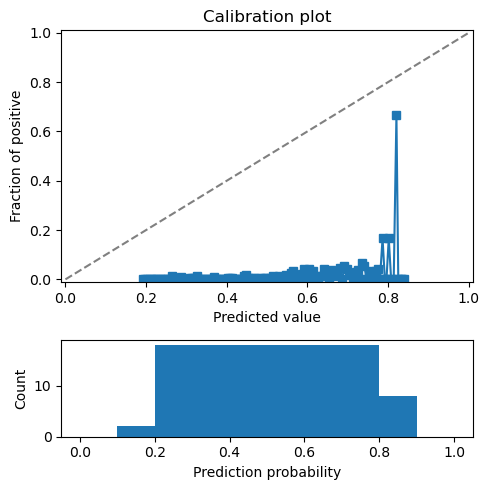

In [150]:

y1, p1 = calibration_curve(M_test1['golds'], cal_1 , n_bins = 100)
y2, p2 = calibration_curve(M_test2['golds'], cal_2 , n_bins = 200)
y3, p3 =calibration_curve(M_test3['golds'], cal_3 , n_bins = 99)
y4, p4 = calibration_curve(M_test4['golds'], cal_4 , n_bins =180)
plotter(p4, y4)

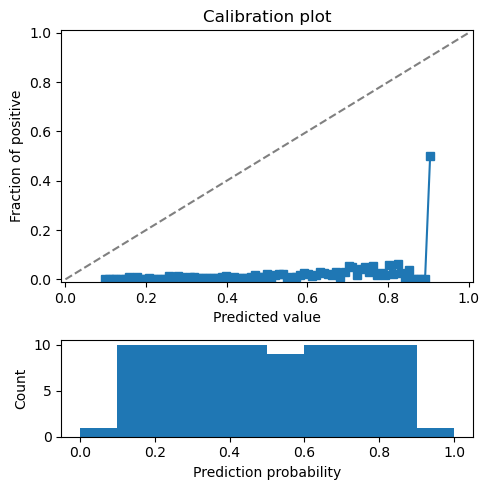

In [151]:
plotter(p3, y3)

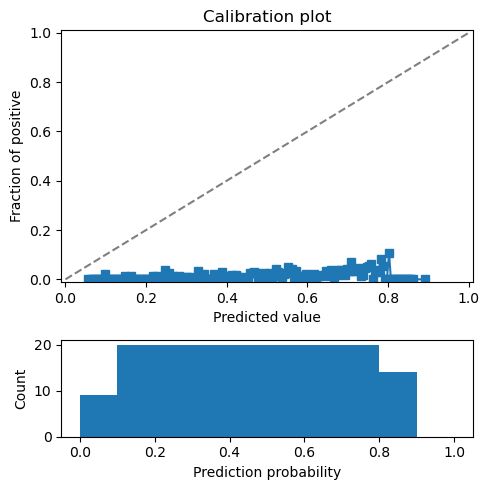

In [152]:
plotter(p2, y2)

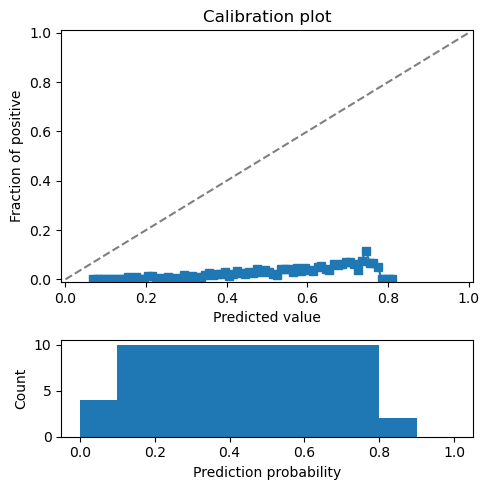

In [153]:
plotter(p1, y1)

In [122]:
import sklearn
from sklearn.metrics import confusion_matrix

In [123]:
sklearn.metrics.roc_auc_score(tgold3,  cal_3 , average = 'samples')


0.7132108023602834

In [124]:
sklearn.metrics.roc_auc_score(tgold4,  cal_4 , average = 'samples')


0.754709382855384

In [125]:
sklearn.metrics.roc_auc_score(tgold1,  cal_1 , average = 'samples')


0.6667921165559247

In [132]:
( confusion_matrix (tgold1,  cal_1>.5) )

array([[8396, 7256],
       [ 150,  330]], dtype=int64)

In [227]:
( confusion_matrix (tgold2,  tc2>.5) )

array([[12250,  1605],
       [  149,    50]], dtype=int64)

In [135]:
( confusion_matrix (tgold3,  cal3>.5) )

NameError: name 'cal3' is not defined

In [134]:
( confusion_matrix (tgold4,  cal_4>.5) )

array([[7410, 4170],
       [  23,   78]], dtype=int64)

In [231]:
( confusion_matrix (tgold1,  tp1>.05) )

array([[ 1657, 13862],
       [   10,   496]], dtype=int64)

In [227]:
( confusion_matrix (tgold2,  tc2>.5) )

array([[12250,  1605],
       [  149,    50]], dtype=int64)

In [228]:
( confusion_matrix (tgold3,  tc3>.5) )

array([[12405,    42],
       [  130,     2]], dtype=int64)

In [229]:
( confusion_matrix (tgold4,  tc4>.5) )

array([[10584,   128],
       [   94,     4]], dtype=int64)

In [67]:
def temperature_multi_w5 (l1, l2,l3,l4, y1, y2, y3, y4, w1, w2, w3, w4):
    def temperature_obj(t):
        logi_1 = (l1 +  t[1])  
        logi_2 = (l2 +  t[2])   
        logi_3 = (l3 +  t[3])   
        logi_4 = (l4 +  t[4])  
        
        p1  = expit (t[0]*   logi_1  )  
        p2  = expit ( t[0] *  logi_2  )  
        p3  = expit (t[0] *  logi_3  )  
        p4  = expit ( t[0] *  logi_4  ) 
        total_loss=log_loss(y1,p1,sample_weight=w1)+log_loss(y2,p2,sample_weight=w2)+ log_loss(y3,p3,sample_weight=w3)+log_loss(y4,p4,sample_weight=w4)        
        return   total_loss
    r = minimize (temperature_obj, x0 = [.1, .1, .1,.1, 
                                         .1 ] )    
    return  r

In [68]:
tt  = temperature_multi_w5( logit(mp1), logit(mp2), logit(mp3), logit(mp4),
                          gold1, gold2, gold3, gold4, wts1, wts2, wts3, wts4  )

In [70]:
def temp_pred  ( j1, test_logit):    
    logi =  ( test_logit   + j1)   
    proba = expit ( tt.x[0] * logi   )  
    return proba

In [71]:
cal_1 = temp_pred(tt.x[1] , logit(tp1) )
cal_2 = temp_pred(tt.x[2],  logit(tp2) )
cal_3 = temp_pred(tt.x[3],  logit(tp3) )
cal_4 = temp_pred(tt.x[4],  logit(tp4) )

In [72]:
y1, p1 = compute_calibration_curve(M_test1['golds'], cal_1 )
y2, p2 = compute_calibration_curve(M_test2['golds'], cal_2 )
y3, p3 = compute_calibration_curve(M_test3['golds'], cal_3 )
y4, p4 = compute_calibration_curve(M_test4['golds'], cal_4 )


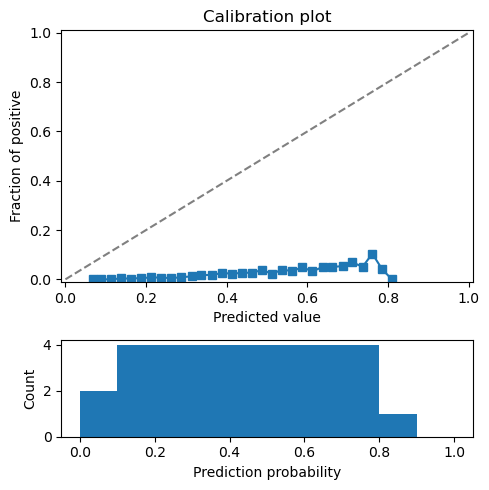

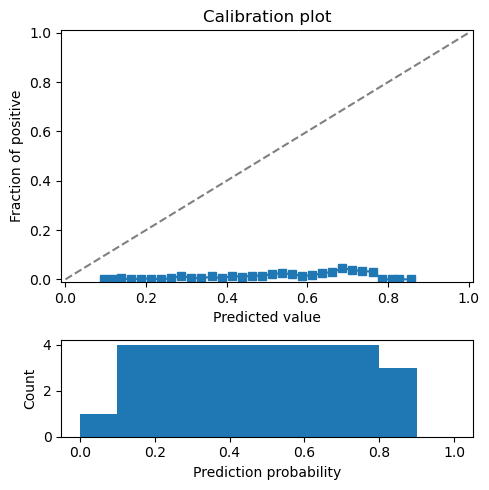

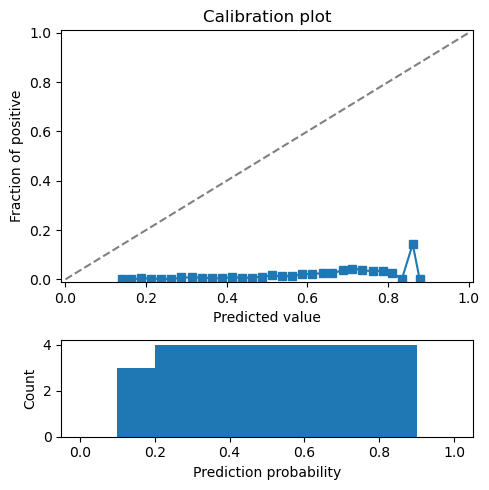

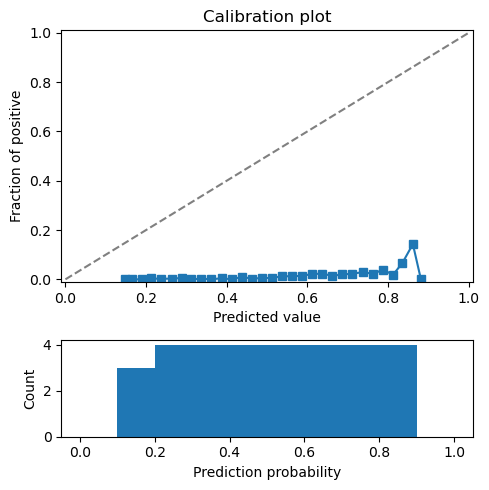

In [73]:
plotter(p1, y1)
plotter(p2, y2)
plotter(p3, y3)
plotter(p4, y4)